In [51]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [52]:
data = pd.read_csv(r'C:/Users/Administrator/Datas/训练数据/商品订单/商品订单数据合并/result.csv',encoding='gbk')

In [53]:
data['jian'] = data['商品原价销售额'] - data['商品实付销售额'] - data['商品总补贴金额']

In [54]:
data.head()

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,jian
0,1,2956803154075995,2020-01-18 21:02:24\t,142秒,花生活鲜花（鲜花格格花艺生活馆）\t,295680,绵阳\t,在线支付,订单完成,配送中,否,204.0,69.0,0.0,174.0,臻选高端\t,单只粉色康乃馨小花束,NaN,NaN,12,204.0,69.0,135.0,135.0,0.0,否,0,0.0,0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买单只粉色康乃馨小花束原价17.0元现价6.0元...,否,未回复,NaN,0.00分,0,2020-01-19 02:21:08\t,NaN,0.0
1,1,2956801656539530,2020-01-19 18:15:14\t,13秒,花生活鲜花（鲜花格格花艺生活馆）\t,295680,绵阳\t,在线支付,订单完成,配送中,否,170.0,65.0,0.0,144.0,年宵花花鼠你最靓\t,『富贵吉祥』富贵竹两把不含花瓶送父母五公里不送仅限五公里内,NaN,NaN,1,170.0,65.0,105.0,105.0,0.0,否,0,0.0,0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『富贵吉祥』富贵竹两把不含花瓶送父母五公里不送...,否,未回复,NaN,0.00分,0,2020-01-19 21:52:39\t,NaN,0.0
2,1,2956803231530438,2020-01-21 17:30:45\t,23秒,花生活鲜花（鲜花格格花艺生活馆）\t,295680,绵阳\t,在线支付,订单完成,配送中,否,204.0,69.0,0.0,174.0,臻选高端\t,单只粉色康乃馨小花束,NaN,NaN,12,204.0,69.0,135.0,135.0,0.0,否,0,0.0,0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买单只粉色康乃馨小花束原价17.0元现价6.0元...,否,未回复,NaN,0.00分,0,2020-01-21 21:57:15\t,NaN,0.0
3,1,6536431702303577,2020-01-10 11:28:22\t,156秒,花生活鲜花（雅景花艺）\t,653643,东莞\t,在线支付,订单完成,配送中,否,278.0,225.0,0.0,92.0,溪水泠泠红色玫瑰\t,『Black yarn B2款』33朵玫瑰鲜花儿黑纱花束,NaN,NaN,1,278.0,225.0,53.0,53.0,0.0,否,0,0.0,0,0.0,是,满200.0元减50.0元/满39.9元赠精美贺卡（可写祝福语）*1/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0,2020-01-10 12:53:10\t,NaN,0.0
4,1,6536430042747760,2020-01-13 21:58:33\t,198秒,花生活鲜花（雅景花艺）\t,653643,东莞\t,在线支付,订单完成,配送中,否,275.0,122.0,0.0,192.0,念念伊人折扣专区\t,『挚爱』11枝红玫瑰花+2只小熊圣诞礼盒送女友闺蜜生日鲜花店,NaN,ZALH09\t,1,275.0,122.0,153.0,153.0,0.0,否,0,0.0,0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『挚爱』11枝红玫瑰花+2只小熊圣诞礼盒送女友...,否,未回复,NaN,0.00分,0,2020-01-14 02:51:19\t,NaN,0.0


In [55]:
# 减去减免几乎就是商家的货  几乎每一个花店服务就是在近期的   远距离几乎没有
data['下单时间'] = pd.to_datetime(data['下单时间'], format ='%Y-%m-%d')


In [56]:
data['下单时间'] = data['下单时间'].dt.hour

In [62]:

result =pd.DataFrame(columns=('sum','time'))
#将计算结果逐行插入result,注意变量要用[]括起来,同时ignore_index=True，否则会报错，ValueError: If using all scalar values, you must pass an index
for i in range(0,24):
    lei = data[data['下单时间'] == i]
    j = len(lei)
    time = i 
    sum_ = j
    result=result.append(pd.DataFrame({'sum':[sum_],'time':[time]}),ignore_index=True)
result

,sum,time
0,709,0
1,395,1
2,213,2
3,125,3
4,103,4
5,135,5
6,355,6
7,995,7
8,2060,8
9,2982,9


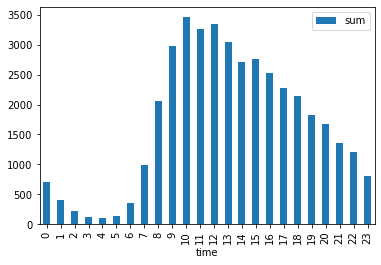

In [63]:
result.plot.bar(x='time',y='sum')